## Linear Regression on `adult.csv`

In [1]:
import pandas as pd

df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

### Explore the data

<Axes: >

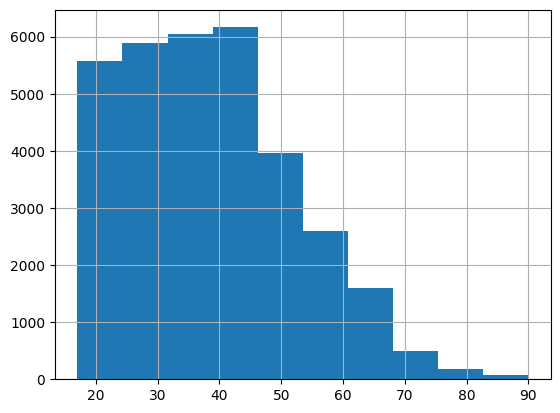

In [3]:
df['age'].hist()

<Axes: xlabel='target'>

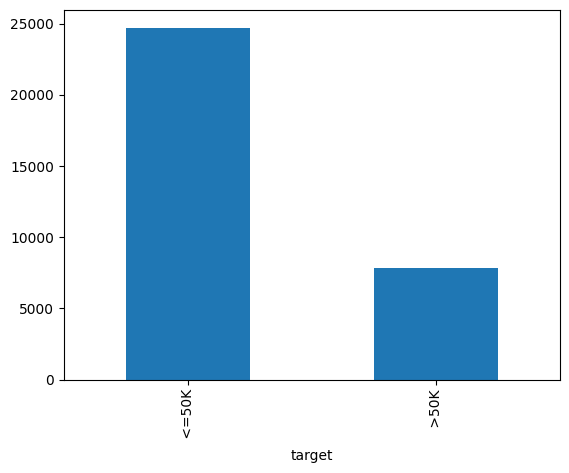

In [4]:
df['target'].value_counts().plot(kind='bar')

<Axes: xlabel='workclass'>

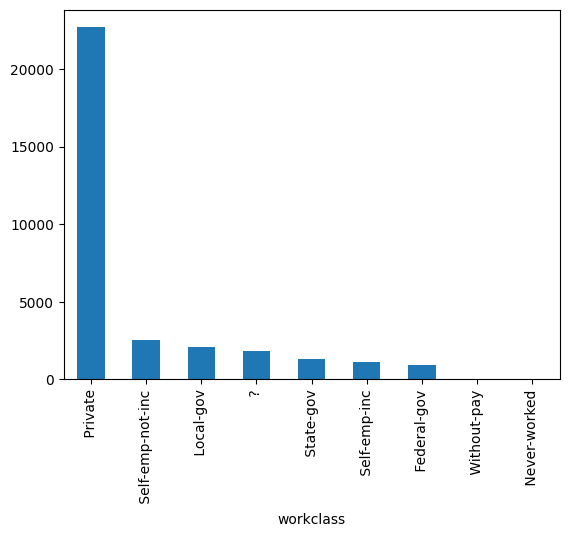

In [5]:
df['workclass'].value_counts().plot(kind='bar')

In [6]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

### Remove the Missing Values

In [7]:
# replace ' ?' with 'Unknown'
df['workclass'] = df['workclass'].replace(' ?', 'Unknown')
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', 'Unknown', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

### Splitting features and target label

In [8]:
x = df.drop('target', axis=1)
y = df['target']

print(f"Shape of x = {x.shape} and y = {y.shape}")

Shape of x = (32561, 14) and y = (32561,)


### Splitting training and testing data - 75 % for training 25 % for testing

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.25)

print(f"x_train: {x_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

x_train: (24420, 14)
x_test: (8141, 14)
y_train: (24420,)
y_test: (8141,)


In [10]:
x_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
9088,37,Private,108913,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,40,United-States
4178,49,Private,166789,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States
16125,21,Private,219137,10th,6,Never-married,Other-service,Own-child,Black,Male,0,0,25,United-States
5414,37,Private,172846,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States
10432,22,Self-emp-inc,150683,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,24,United-States


In [11]:
x_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
4692,55,Self-emp-not-inc,168625,Some-college,10,Divorced,Tech-support,Not-in-family,White,Female,0,0,12,United-States
3001,55,Private,189528,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States
23490,29,Private,201155,9th,5,Never-married,Sales,Not-in-family,White,Female,0,0,48,United-States
26923,51,Private,310774,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
7682,31,Private,248178,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,35,United-States


### Standardize the data

In [12]:
# Column Transformation
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_attributes = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_attributes = x_train.select_dtypes(include=['object']).columns

ct = ColumnTransformer([
    ('standar_sclaer', StandardScaler(), numerical_attributes),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'), categorical_attributes)
]).fit(x_train)

transformed_x_train = ct.transform(x_train)
transformed_x_test = ct.transform(x_test)

transformed_x_train, transformed_x_test

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 341880 stored elements and shape (24420, 108)>,
 <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 113974 stored elements and shape (8141, 108)>)

### Dimensionality Reduction using PCA

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(transformed_x_train)

x_train_pca = pca.transform(transformed_x_train)
x_test_pca = pca.transform(transformed_x_test)

In [14]:
x_train_pca, x_test_pca

(array([[-0.58753741, -0.24801166],
        [ 0.48943493, -1.1667461 ],
        [-2.46886551, -0.26227779],
        ...,
        [ 0.47622396, -0.50247333],
        [-2.12616677,  0.41026702],
        [ 1.58173485,  0.28349721]], shape=(24420, 2)),
 array([[-0.82663257, -0.81452213],
        [ 0.71775695, -2.49411712],
        [-1.50800018, -0.51745512],
        ...,
        [-0.82481594,  0.2898863 ],
        [ 0.11305266, -0.02948532],
        [ 1.44489454, -0.01156763]], shape=(8141, 2)))

### Linear and Logistic Regression

In [15]:
# Import the necessary libraries
from sklearn.linear_model import LinearRegression, LogisticRegression

# Initialize the Linear Regression model
linear_regression = LinearRegression()
logistic_regression = LogisticRegression()

# Fit the model to your training data
linear_regression.fit(transformed_x_train, y_train)
logistic_regression.fit(transformed_x_train, y_train)

# Make predictions using the fitted model
y_test_pred_linear = linear_regression.predict(transformed_x_test)
y_test_pred_logistic = logistic_regression.predict(transformed_x_test)

In [16]:
print(f"Score for Linear Regression: {linear_regression.score(transformed_x_test, y_test)}")
print(f"Score for Logistic Regression: {logistic_regression.score(transformed_x_test, y_test)}")

Score for Linear Regression: 0.36231889246805093
Score for Logistic Regression: 0.8562830119149981


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_test_pred_linear)
mse = mean_squared_error(y_test, y_test_pred_linear)
r2 = r2_score(y_test, y_test_pred_linear)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.26238329944487576
Mean Squared Error (MSE): 0.11430076246612836
R-squared (R²): 0.36231889246805093


In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_test_pred_logistic)
class_report = classification_report(y_test, y_test_pred_logistic)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8562830119149981
Confusion Matrix:
[[5814  422]
 [ 748 1157]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6236
           1       0.73      0.61      0.66      1905

    accuracy                           0.86      8141
   macro avg       0.81      0.77      0.79      8141
weighted avg       0.85      0.86      0.85      8141



### Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Naive Bayes model
naive_bayes = GaussianNB()

# Fit the model to your training data
naive_bayes.fit(transformed_x_train.toarray(), y_train)

# Make predictions using the fitted model
y_test_pred_naive_bayes = naive_bayes.predict(transformed_x_test.toarray())

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred_naive_bayes)
conf_matrix = confusion_matrix(y_test, y_test_pred_naive_bayes)
class_report = classification_report(y_test, y_test_pred_naive_bayes)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.5300331654587889
Confusion Matrix:
[[2477 3759]
 [  67 1838]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.40      0.56      6236
           1       0.33      0.96      0.49      1905

    accuracy                           0.53      8141
   macro avg       0.65      0.68      0.53      8141
weighted avg       0.82      0.53      0.55      8141



### SVM

In [21]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC()

# Fit the classifier to your transformed training data
svm_classifier.fit(transformed_x_train, y_train)

# Make predictions using the fitted classifier
y_test_pred_svm = svm_classifier.predict(transformed_x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred_svm)
conf_matrix = confusion_matrix(y_test, y_test_pred_svm)
class_report = classification_report(y_test, y_test_pred_svm)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8580027023707161
Confusion Matrix:
[[5855  381]
 [ 775 1130]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6236
           1       0.75      0.59      0.66      1905

    accuracy                           0.86      8141
   macro avg       0.82      0.77      0.79      8141
weighted avg       0.85      0.86      0.85      8141



### Comparing the performance of different models

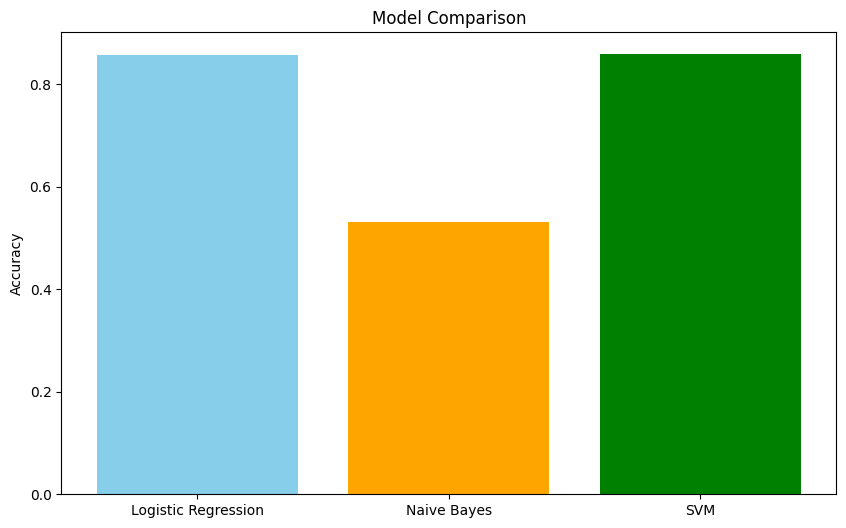

In [24]:
# Initialize the models
logistic_regression = LogisticRegression()
naive_bayes = GaussianNB()
svm_classifier = SVC()

# Fit the models
logistic_regression.fit(transformed_x_train, y_train)
naive_bayes.fit(transformed_x_train.toarray(), y_train)
svm_classifier.fit(transformed_x_train, y_train)

# Make predictions
y_test_pred_logistic = logistic_regression.predict(transformed_x_test)
y_test_pred_naive_bayes = naive_bayes.predict(transformed_x_test.toarray())
y_test_pred_svm = svm_classifier.predict(transformed_x_test)

# Evaluate the models
accuracy_logistic = accuracy_score(y_test, y_test_pred_logistic)
accuracy_naive_bayes = accuracy_score(y_test, y_test_pred_naive_bayes)
accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

# Plot the accuracies
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Naive Bayes', 'SVM']
accuracies = [accuracy_logistic, accuracy_naive_bayes, accuracy_svm]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'orange', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()